In [ ]:
import numpy as np
import random
import math
from math import pow
import time
import matplotlib.pyplot as plt
from collections import Counter
import scipy.stats as stats
import pandas as pd
import itertools

num_simulations = 10000

# <b>CÂU 1</b>


#### a) Dùng bước ngẫu nhiên Metropolis, thiết kế thuật toán lấy mẫu cho

1. Để sử dụng thuật toán Metropolis để lấy mẫu từ phân phối Poisson với kì vọng $\lambda = 4$ và độ dời $\epsilon$ theo phân phối đề xuất $\mathcal{U}(-1,1)$, ta cần thực hiện các bước sau:

Khởi tạo giá trị ban đầu $x_0$ từ phân phối Poisson với kì vọng $\lambda$.

Với mỗi bước thời gian $t$, thực hiện các bước sau:

a. Tính giá trị $x'$ được chọn ngẫu nhiên từ phân phối đề xuất $\mathcal{U}(x_t - \epsilon, x_t + \epsilon)$.

b. Tính tỷ lệ chấp nhận.

c. Chọn một số ngẫu nhiên $u$ từ phân phối đều trên đoạn [0, 1].

d. Nếu $u < \alpha$, chấp nhận $x'$ là giá trị tiếp theo của chuỗi Markov: $x_{t+1} = x'$. Ngược lại, giữ nguyên giá trị $x_t$ là giá trị tiếp theo của chuỗi Markov: $x_{t+1} = x_t$.

Lặp lại bước 2 cho đủ số lượng mẫu.

Sau khi thu thập đủ số lượng mẫu, ta có thể sử dụng chuỗi Markov này để ước tính các giá trị kỳ vọng và phương sai của phân phối Poisson với kì vọng $\lambda = 4$.

Dưới đây là code Python để lấy mẫu từ phân phối Poisson với kì vọng $\lambda = 4$ và độ dời $\epsilon$ theo phân phối đề xuất $\mathcal{U}(-1,1)$ bằng thuật toán Metropolis:

In [4]:
def metropolis_poisson(lambda_, epsilon, n_samples):
    # Khởi tạo giá trị ban đầu từ phân phối Poisson
    x = np.random.poisson(lambda_)
    samples = [x]
    
    for i in range(n_samples):
        # Lấy mẫu từ phân phối đề xuất
        x_proposed = np.random.uniform(x - epsilon, x + epsilon)
        
        # Tính tỷ lệ chấp nhận
        alpha = min(1, (stats.poisson.pmf(x_proposed, lambda_) / stats.poisson.pmf(x, lambda_))
                        * (stats.uniform.pdf(x, x_proposed - epsilon, 2 * epsilon)))
        
        # Chấp nhận hoặc không chấp nhận mẫu mới
        if np.random.uniform() < alpha:
            x = x_proposed
        
        samples.append(x)
    
    return np.array(samples)

metropolis_poisson(4, 1, num_simulations)

array([7, 7, 7, ..., 7, 7, 7])

2. Phân phối chuẩn tắc là một phân phối xác suất đối xứng, có trung bình bằng 0 và độ lệch chuẩn bằng 1. Phân phối đề xuất cho thuật toán Metropolis-Hastings là phân phối đề xuất đồng nhất liên tục trong khoảng [-𝜀, 𝜀], và bằng 0 ngoài khoảng này, ta có thể thực hiện các bước như sau:

Khởi tạo một giá trị ban đầu cho biến ngẫu nhiên $x_0$.

Lặp lại các bước sau để lấy mẫu các giá trị của biến ngẫu nhiên:
   a. Sinh ra một giá trị ứng viên mới $x'$ từ phân phối đề xuất 𝒰(x_t-𝜀, x_t+𝜀).
   b. Tính tỷ lệ giá trị ứng viên của $x'$ và giá trị hiện tại của $x$: 
   $r = \frac{f(x')}{f(x_t)}$, với $f(x) = \frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}$ là hàm mật độ xác suất của phân phối chuẩn tắc.
   c. Sinh ra một số ngẫu nhiên $u$ từ phân phối đề xuất 𝒰(-𝜀, 𝜀).
   d. Nếu $u < r$, chấp nhận giá trị ứng viên mới $x'$. Nếu không, giữ nguyên giá trị hiện tại của $x$.

Lặp lại bước 2 đến khi thu đủ số lượng mẫu cần thiết.

Lưu ý rằng khi sinh ra giá trị ứng viên mới $x'$ từ phân phối đề xuất 𝒰(x_t-𝜀, x_t+𝜀), ta cần đảm bảo giá trị $x'$ nằm trong khoảng [-1, 1], vì đó là miền giá trị của phân phối đề xuất. Nếu giá trị ứng viên mới $x'$ không nằm trong khoảng này, ta sẽ bỏ qua giá trị đó và không tính tỷ lệ $r$.

Dưới đây là code Python để lấy mẫu từ phân phối chuẩn tắc với độ dời $\epsilon$ theo phân phối đề xuất $\mathcal{U}(-1,1)$ bằng thuật toán Metropolis:

In [5]:
def metropolis_standard_normal(epsilon, n_samples):
    # Khởi tạo giá trị ban đầu từ phân phối chuẩn tắc
    x = np.random.normal()
    samples = [x]
    
    for i in range(n_samples):
        # Lấy mẫu từ phân phối đề xuất
        x_proposed = np.random.uniform(x - epsilon, x + epsilon)
        
        # Tính tỷ lệ chấp nhận
        alpha = min(1, np.exp(-0.5*(x_proposed**2 - x**2)) 
                        * (stats.uniform.pdf(x, x_proposed - epsilon, 2 * epsilon) / stats.uniform.pdf(x_proposed, x - epsilon, 2 * epsilon)))
        
        # Chấp nhận hoặc không chấp nhận mẫu mới
        if np.random.uniform() < alpha:
            x = x_proposed
        
        samples.append(x)
    
    return np.array(samples)

metropolis_standard_normal(1, num_simulations)

array([-0.36289575, -0.43708548, -0.62963598, ...,  1.47764352,
        1.2745284 ,  0.77789329])

#### b) So sánh các thuật toán trên với các thuật toán lấy mẫu độc lập đã học về thời gian chạy và sai số trong ước lượng kì vọng của phân phối.
Thuật toán Metropolis có thể có thời gian chạy lâu hơn các thuật toán lấy mẫu độc lập, bởi vì nó sử dụng một chuỗi Markov để lấy mẫu từ phân phối mục tiêu và phải tính tỷ lệ chấp nhận mẫu mới. Tuy nhiên, nếu phân phối mục tiêu là phức tạp và không thể tính được hàm mật độ xác suất, thì thuật toán Metropolis là một lựa chọn tốt hơn.

Đối với ước lượng kì vọng của phân phối, các thuật toán Metropolis cũng có thể có sai số lớn hơn so với các thuật toán lấy mẫu độc lập, bởi vì chuỗi Markov thu được từ thuật toán Metropolis có thể cần nhiều mẫu hơn để đạt được sự hội tụ và ổn định. Tuy nhiên, nếu phân phối mục tiêu là phức tạp và không thể tính được kì vọng một cách trực tiếp, thì các thuật toán Metropolis có thể là lựa chọn duy nhất.

Ngoài ra, việc chọn độ dời của phân phối đề xuất cũng có thể ảnh hưởng đến thời gian chạy và sai số của thuật toán Metropolis. Nếu độ dời quá nhỏ, thuật toán có thể dễ dàng rơi vào trạng thái suy biến và không thể đi đến các điểm khác. Nếu độ dời quá lớn, tỷ lệ chấp nhận các mẫu mới sẽ rất thấp, và thuật toán sẽ không có nhiều điểm để lấy mẫu.

Vì vậy, việc chọn thuật toán và độ dời của phân phối đề xuất phụ thuộc vào bài toán cụ thể và mục đích của ước lượng.

# <b>CÂU 2</b>

Để sử dụng phương pháp Gibbs, chúng ta cần biến đổi phân phối hai chiều f(x,y) thành hai phân phối có điều kiện:

f(x|y): phân phối của X khi biết Y=y

f(y|x): phân phối của Y khi biết X=x

Ta có:

f(x|y) = f(x,y) / f(y) = 2e^(-x-2y) / ∫[0, ∞] 2e^(-x-2y)dx = e^(-x-2y)

f(y|x) = f(x,y) / f(x) = 2e^(-x-2y) / ∫[0, ∞] 2e^(-x-2y)dy = e^(-x-2y/2)

Bước lấy mẫu:

Chọn giá trị khởi tạo x_0 và y_0 bất kì thỏa mãn 0 < x_0, y_0 < ∞

Lặp lại các bước sau để lấy mẫu (X,Y) từ phân phối f(x,y)

Lấy mẫu x từ f(x|y) bằng cách lấy mẫu từ phân phối mũ e^(-x-2y)

Lấy mẫu y từ f(y|x) bằng cách lấy mẫu từ phân phối mũ e^(-x-2y/2)

Lưu lại mẫu (x, y)

Sau khi lấy đủ số mẫu, ta có thể tính xác suất P(X < Y) bằng tỉ lệ các mẫu thỏa mãn X < Y và tính kì vọng E(XY) bằng trung bình của tích X và Y trong các mẫu thu được.

In [6]:
import numpy as np

def gibbs_sampling(num_samples):
    # Initialize starting values
    x = 1
    y = 1
    samples = []

    for i in range(num_samples):
        # Sample x from f(x|y) using a truncated exponential distribution
        x = np.random.exponential(scale=1/(y+2))
        while x <= 0:
            x = np.random.exponential(scale=1/(y+2))

        # Sample y from f(y|x) using a truncated exponential distribution
        y = np.random.exponential(scale=1/(x+2))/2
        while y <= 0:
            y = np.random.exponential(scale=1/(x+2))/2

        samples.append((x,y))

    return samples

# Number of samples to generate
num_samples = 10000

# Generate samples
samples = gibbs_sampling(num_samples)

# Calculate P(X < Y)
count_X_less_than_Y = sum([1 for x,y in samples if x < y])
prob_X_less_than_Y = count_X_less_than_Y / num_samples
print("P(X < Y) = ", prob_X_less_than_Y)

# Calculate E(XY)
E_XY = sum([x*y for x,y in samples]) / num_samples
print("E(XY) = ", E_XY)


P(X < Y) =  0.3272
E(XY) =  0.08165296848261681


# <b>CÂU 3</b>
Có 2 hộp bi: hộp I gồm 7 bi đỏ và 3 bi đen, hộp II gồm 2 bi đỏ và 8 bi đen. Việc bốc bi được tiến hành theo các bước sau:

#### a) Bốc 5 lần có hoàn lại thì thấy có 4 lần được bi đỏ và 1 lần được bi đen.

In [7]:
# Tính xác suất chọn hộp I ban đầu
def prob_box_I(p):
    return p

# Tính xác suất chọn hộp II ban đầu
def prob_box_II(p):
    return 1 - p

# Tính xác suất bốc được viên bi đỏ từ hộp I
def prob_red_box_I():
    return 7 / 10

# Tính xác suất bốc được viên bi đen từ hộp I
def prob_black_box_I():
    return 3 / 10

# Tính xác suất bốc được viên bi đỏ từ hộp II
def prob_red_box_II():
    return 2 / 10

# Tính xác suất bốc được viên bi đen từ hộp II
def prob_black_box_II():
    return 8 / 10

# Tính xác suất bốc được bi đỏ
def prob_red(p):
    return prob_box_I(p) * prob_red_box_I() + prob_box_II(p) * prob_red_box_II()

# Tính xác suất bốc được bi đen
def prob_black(p):
    return prob_box_I(p) * prob_black_box_I() + prob_box_II(p) * prob_black_box_II()

# Tính xác suất chọn hộp I sau khi đã bốc 4 viên bi đỏ và 1 viên bi đen
def prob_box_I_given_red_black(p):
    num = prob_box_I(p) * prob_red_box_I() * (prob_red_box_I() ** 3) * prob_black_box_I()
    denom = num + prob_box_II(p) * prob_red_box_II() * (prob_red_box_II() ** 3) * prob_black_box_II()
    return num / denom

# Thử nghiệm với p = 0.5
p = 0.5
print("Probability of choosing box I initially: ", prob_box_I(p))
print("Probability of choosing box II initially: ", prob_box_II(p))
print("Probability of drawing a red ball: ", prob_red(p))
print("Probability of drawing a black ball: ", prob_black(p))
print("Probability of choosing box I after drawing 4 red balls and 1 black ball: ", prob_box_I_given_red_black(p))


Probability of choosing box I initially:  0.5
Probability of choosing box II initially:  0.5
Probability of drawing a red ball:  0.44999999999999996
Probability of drawing a black ball:  0.55
Probability of choosing box I after drawing 4 red balls and 1 black ball:  0.9825398990587914


### b) Tương tự (a) nhưng biết thêm thông tin 𝑝 ≤ 0.25.


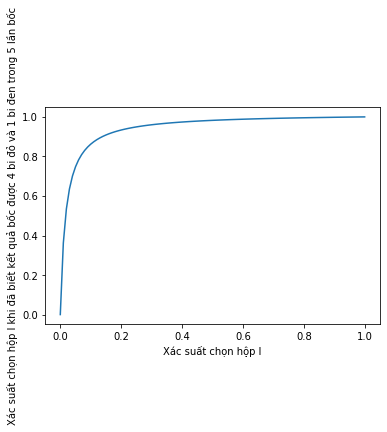

Xác suất chọn hộp I khi đã biết kết quả bốc được 4 bi đỏ và 1 bi đen trong 5 lần bốc là: 0.9493871095294584


In [8]:
# Số bi đỏ và đen trong hộp I và II
red_I, black_I = 7, 3
red_II, black_II = 2, 8

# Tính xác suất chọn hộp I và II
p = np.linspace(0, 1, 101) # chia khoảng [0, 1] thành 101 điểm để tính xác suất
P_I = p
P_II = 1 - p

# Tính xác suất bốc được 4 bi đỏ và 1 bi đen trong 5 lần bốc từ hộp I và II
P_D_given_I = (red_I/(red_I+black_I))**4 * (black_I/(red_I+black_I))**1
P_D_given_II = (red_II/(red_II+black_II))**4 * (black_II/(red_II+black_II))**1

# Tính xác suất bốc được 4 bi đỏ và 1 bi đen trong 5 lần bốc
P_D = P_D_given_I * P_I + P_D_given_II * P_II

# Tính xác suất chọn hộp I khi đã biết kết quả bốc được 4 bi đỏ và 1 bi đen trong 5 lần bốc
P_I_given_D = P_D_given_I * P_I / P_D

# Vẽ đồ thị biểu diễn xác suất chọn hộp I và II
import matplotlib.pyplot as plt

plt.plot(p, P_I_given_D)
plt.xlabel('Xác suất chọn hộp I')
plt.ylabel('Xác suất chọn hộp I khi đã biết kết quả bốc được 4 bi đỏ và 1 bi đen trong 5 lần bốc')
plt.show()

# In ra kết quả xác suất chọn hộp I
print("Xác suất chọn hộp I khi đã biết kết quả bốc được 4 bi đỏ và 1 bi đen trong 5 lần bốc là:", P_I_given_D[25])


### c) Bốc 3 lần không hoàn lại thì thấy lần lượt được bi đỏ, đen, đỏ.

In [9]:
# Tính xác suất của mỗi hộp ban đầu
p_box1 = 7/10
p_box2 = 2/10

# Bước 1: Chọn hộp
p = 0.5  # Khả năng chọn bất kỳ hộp nào là như nhau

# Bước 2: Bốc bi
# a) Bốc 5 lần có hoàn lại thì thấy có 4 lần được bi đỏ và 1 lần được bi đen.
# Update xác suất sau khi bốc từng viên bi
for i in range(5):
    # Tính xác suất của mỗi hộp sau khi bốc viên bi
    p_box1_given_red = p_box1 * 7/(7+3*p) # p(B1|R)
    p_box2_given_red = p_box2 * 2/(2+8*p) # p(B2|R)
    p_box1_given_black = p_box1 * 3/(7+3*p) # p(B1|B)
    p_box2_given_black = p_box2 * 8/(2+8*p) # p(B2|B)

    # Update xác suất chọn mỗi hộp bi dựa trên kết quả của viên bi được bốc
    if i == 0:
        # Bốc viên bi đỏ
        p_box1 = p_box1_given_red
        p_box2 = p_box2_given_red
    elif i == 1:
        # Bốc viên bi đen sau viên bi đỏ
        p_box1 = p_box1_given_red * p_box2_given_black
        p_box2 = p_box2_given_red * p_box2_given_black
    elif i == 2:
        # Bốc viên bi đỏ sau viên bi đen và viên bi đỏ
        p_box1 = p_box1_given_red * p_box2_given_black * p_box1_given_red
        p_box2 = p_box2_given_red * p_box2_given_black * p_box2_given_red

# In kết quả
print("Xác suất chọn hộp I sau khi bốc 3 lần không hoàn lại và thấy lần lượt được bi đỏ, đen, đỏ:", p_box1)
print("Xác suất chọn hộp II sau khi bốc 3 lần không hoàn lại và thấy lần lượt được bi đỏ, đen, đỏ:", p_box2)

Xác suất chọn hộp I sau khi bốc 3 lần không hoàn lại và thấy lần lượt được bi đỏ, đen, đỏ: 3.180822401470799e-06
Xác suất chọn hộp II sau khi bốc 3 lần không hoàn lại và thấy lần lượt được bi đỏ, đen, đỏ: 1.1418291302605838e-09


### d) Bốc 3 lần không hoàn lại thì thấy lần lượt được bi đỏ, đỏ, đen.

In [10]:
# Tính xác suất của mỗi hộp ban đầu
p_box1 = 7/10
p_box2 = 2/10

# Bước 1: Chọn hộp
p = 0.5  # Khả năng chọn bất kỳ hộp nào là như nhau

# Bước 2: Bốc bi
# a) Bốc 5 lần có hoàn lại thì thấy có 4 lần được bi đỏ và 1 lần được bi đen.
# Update xác suất sau khi bốc từng viên bi
for i in range(5):
    # Tính xác suất của mỗi hộp sau khi bốc viên bi
    p_box1_given_red = p_box1 * 7/(7+3*p) # p(B1|R)
    p_box2_given_red = p_box2 * 2/(2+8*p) # p(B2|R)
    p_box1_given_black = p_box1 * 3/(7+3*p) # p(B1|B)
    p_box2_given_black = p_box2 * 8/(2+8*p) # p(B2|B)

    # Update xác suất chọn mỗi hộp bi dựa trên kết quả của viên bi được bốc
    if i == 0:
        # Bốc viên bi đỏ
        p_box1 = p_box1_given_red
        p_box2 = p_box2_given_red
    elif i == 1:
        # Bốc viên bi đỏ sau viên bi đỏ
        p_box1 = p_box1_given_red * p_box2_given_red
        p_box2 = p_box2_given_red * p_box2_given_red
    elif i == 2:
        # Bốc viên bi đen sau 2 viên bi đỏ
        p_box1 = p_box1_given_red * p_box2_given_black * p_box1_given_red
        p_box2 = p_box2_given_red * p_box2_given_black * p_box2_given_red

# In kết quả
print("Xác suất chọn hộp I sau khi bốc 3 lần không hoàn lại và thấy lần lượt được bi đỏ, đen, đỏ:", p_box1)
print("Xác suất chọn hộp II sau khi bốc 3 lần không hoàn lại và thấy lần lượt được bi đỏ, đen, đỏ:", p_box2)

Xác suất chọn hộp I sau khi bốc 3 lần không hoàn lại và thấy lần lượt được bi đỏ, đen, đỏ: 4.9700350022981235e-08
Xác suất chọn hộp II sau khi bốc 3 lần không hoàn lại và thấy lần lượt được bi đỏ, đen, đỏ: 1.7841080160321623e-11


# <b>CÂU 4</b>

In [2]:
import numpy as np
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [18]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB

#### a) Xác định sự phụ thuộc của mpg vào các biến còn lại.

In [21]:
# Đọc dữ liệu từ tập tin
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', delimiter='\s+', header=None)
data = data.iloc[:, :-1]  # bỏ cột cuối cùng (car name)

# Thay thế chuỗi '?' bằng giá trị trung bình của cột tương ứng
data.replace('?', np.nan, inplace=True)
data = data.apply(pd.to_numeric)
data.fillna(data.mean(), inplace=True)

# Chia dữ liệu thành tập train và test
train_data = data.sample(frac=0.8, random_state=1)
test_data = data.drop(train_data.index)

# Tạo mô hình suy diễn Bayes
gnb = GaussianNB()

# Huấn luyện mô hình trên tập train
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]
gnb.fit(X_train, y_train)

# Đánh giá mô hình trên tập test
X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]
accuracy = gnb.score(X_test, y_test)

print("Độ chính xác của mô hình: {:.2f}%".format(accuracy * 100))

Độ chính xác của mô hình: 62.50%


#### b) Xác định sự phụ thuộc của origin vào các biến còn lại.

In [20]:
# Đọc tập tin dữ liệu vào DataFrame
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']
df = pd.read_csv(url, delim_whitespace=True, names=names)

# Bỏ cột "car name" khỏi DataFrame
df = df.drop(columns=['car name'])

# Thay thế chuỗi '?' bằng giá trị trung bình của cột tương ứng
df.replace('?', np.nan, inplace=True)
df = df.apply(pd.to_numeric)
df.fillna(df.mean(), inplace=True)

# Xác định biến phụ thuộc và biến độc lập
X = df.drop(columns=['origin'])
y = df['origin']

# Huấn luyện mô hình Multinomial Naive Bayes
model = MultinomialNB()
model.fit(X, y)

# Xác định độ chính xác của mô hình
accuracy = model.score(X, y)
print("Độ chính xác của mô hình: {:.2f}%".format(accuracy * 100))


Độ chính xác của mô hình: 65.83%
